In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [55]:
# fetch the training file
file_path_20_percent = '../input/nslkdd/KDDTrain+_20Percent.txt'
file_path_full_training_set = '../input/nslkdd/KDDTrain+.txt'
file_path_test = '../input/nslkdd/KDDTest+.txt' 

#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [56]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [57]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [58]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [59]:
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [60]:
print("shape")
np.shape(df)

shape


(125972, 45)

In [61]:
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.6)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.6)
binary_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50388 entries, 19118 to 35685
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   protocol_type_icmp   50388 non-null  bool 
 1   protocol_type_tcp    50388 non-null  bool 
 2   protocol_type_udp    50388 non-null  bool 
 3   service_IRC          50388 non-null  bool 
 4   service_X11          50388 non-null  bool 
 5   service_Z39_50       50388 non-null  bool 
 6   service_aol          50388 non-null  bool 
 7   service_auth         50388 non-null  bool 
 8   service_bgp          50388 non-null  bool 
 9   service_courier      50388 non-null  bool 
 10  service_csnet_ns     50388 non-null  bool 
 11  service_ctf          50388 non-null  bool 
 12  service_daytime      50388 non-null  bool 
 13  service_discard      50388 non-null  bool 
 14  service_domain       50388 non-null  bool 
 15  service_domain_u     50388 non-null  bool 
 16  service_echo         50

In [62]:
binary_train_X.sample(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
67251,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,224,6552
63543,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,1,0
33401,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,42,108
52433,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,0,0,0
88451,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,0,0,0


# **Ensemble 1** : *Random Forest*

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize and train the RandomForestClassifier
binary_model = RandomForestClassifier()
binary_model.fit(binary_train_X, binary_train_y)

# Make predictions on the validation set
binary_predictions = binary_model.predict(binary_val_X)

# Calculate accuracy
accuracy = accuracy_score(binary_val_y, binary_predictions)

# Calculate precision
precision = precision_score(binary_val_y, binary_predictions)

# Calculate recall
recall = recall_score(binary_val_y, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.993212849280271
Precision: 0.9909621486854034
Recall: 0.9944840920076199


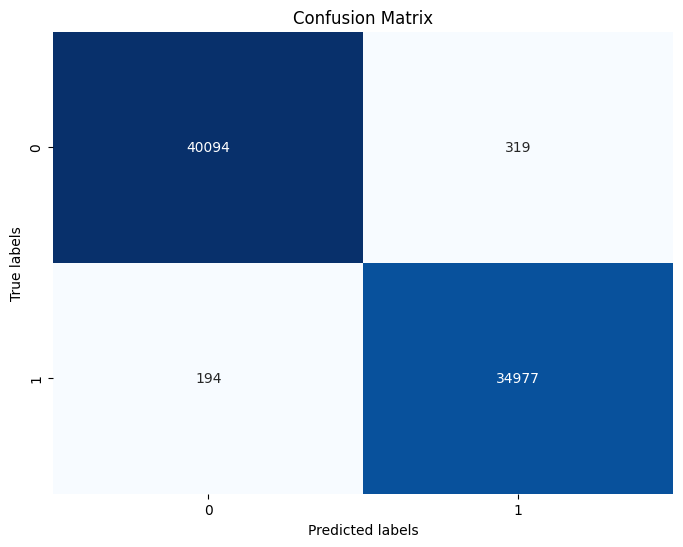

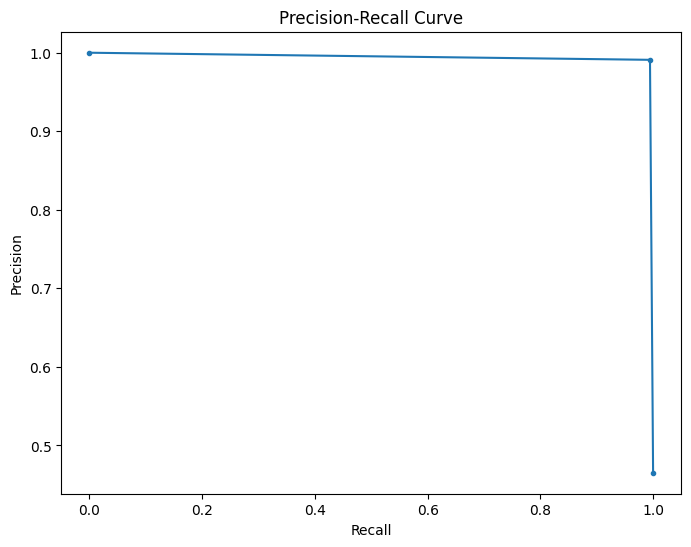

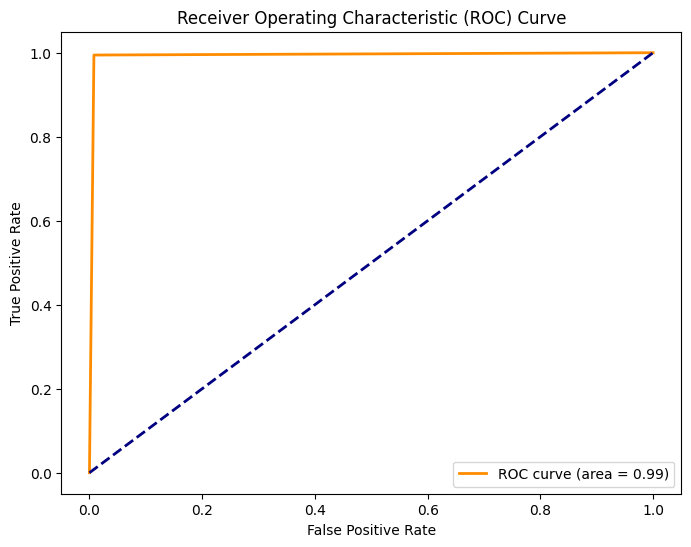

In [65]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(binary_val_y, binary_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(binary_val_y, binary_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(binary_val_y, binary_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Ensemble 2** : *Random Forest, Logistic Regression, K Neighbors*

In [24]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define the base classifiers
clf1 = RandomForestClassifier()
clf2 = LogisticRegression(max_iter=250)
clf3 = KNeighborsClassifier()

# Create the ensemble
ensemble_clf1 = VotingClassifier(
    estimators=[('rf', clf1), ('lr', clf2), ('knn', clf3)],
    voting='hard'  # Use 'hard' voting for classifiers that predict labels
)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the ensemble classifier
ensemble_clf1.fit(binary_train_X, binary_train_y)  # Replace X_train and y_train with your training data

# Make predictions
predictions = ensemble_clf1.predict(binary_val_X)  # Replace X_test with your test data

# Calculate accuracy
accuracy = accuracy_score(binary_val_y, predictions)  # Replace y_test with your test labels
precision = precision_score(binary_val_y, predictions)  # Replace y_test with your test labels
recall = recall_score(binary_val_y, predictions)  # Replace y_test with your test labels

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9917575148179509
Precision: 0.989044050862852
Recall: 0.993244591397543


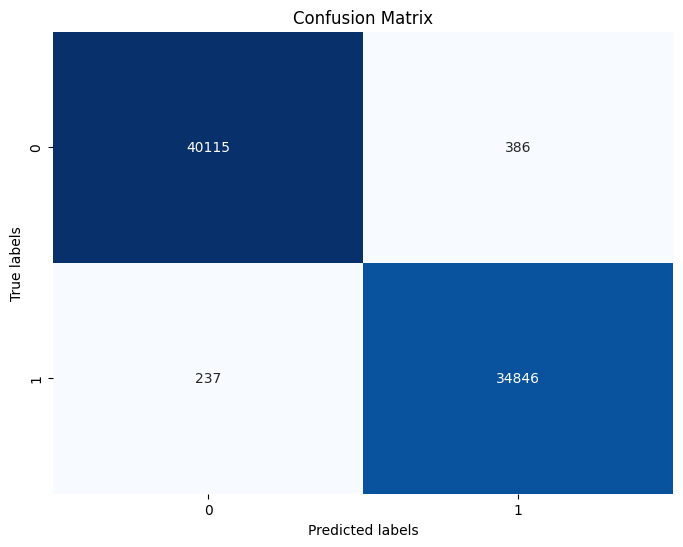

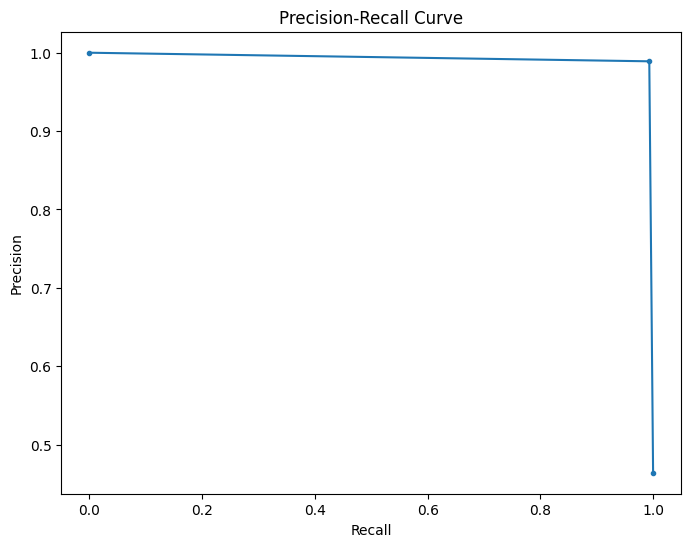

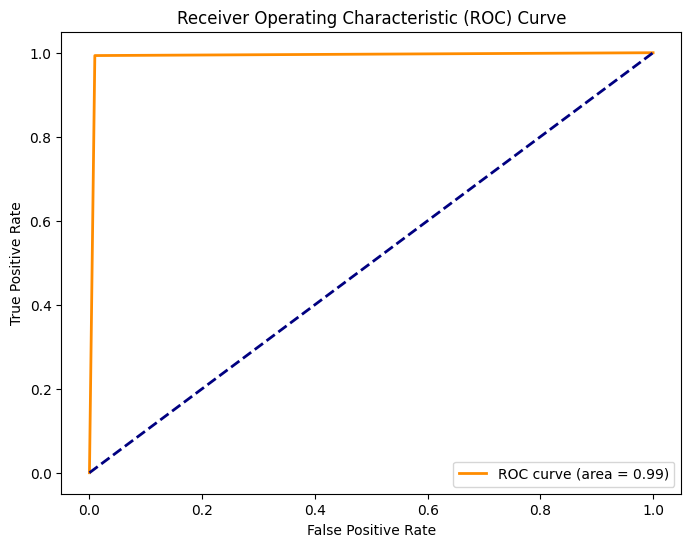

In [26]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(binary_val_y, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(binary_val_y, predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(binary_val_y, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Ensemble 3: *SVM, XGboost, LightGBM*

In [35]:
# fetch the training file
file_path_20_percent = '../input/nslkdd/KDDTrain+_20Percent.txt'
file_path_full_training_set = '../input/nslkdd/KDDTrain+.txt'
file_path_test = '../input/nslkdd/KDDTest+.txt' 

#df = pd.read_csv(file_path_20_percent)
train = pd.read_csv(file_path_full_training_set)
test = pd.read_csv(file_path_test)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [37]:
labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack_type','outcome']

train.columns = labels
test.columns = labels

data = pd.concat([train, test])
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [38]:
data['attack_check'] = np.where(data['attack_type']!= 'normal', 1, 0)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,outcome,attack_check
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,0
22539,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,0
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,1
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


<Axes: xlabel='attack_check', ylabel='count'>

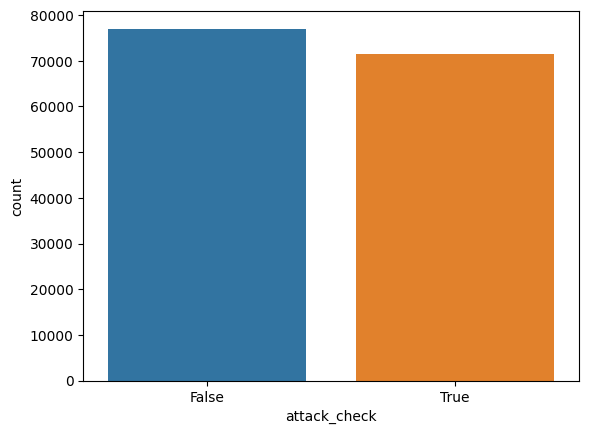

In [7]:
sns.countplot(x=data["attack_check"])

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    if (data[i].dtypes== 'object') :
        data[i] = le.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  int64  
 2   service                      148515 non-null  int64  
 3   flag                         148515 non-null  int64  
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13  root_

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['attack_check']))  # Assuming 'df' is your DataFrame

# Apply PCA
pca = PCA(n_components=0.95)  # You can specify the desired explained variance ratio or number of components
pca.fit(scaled_data)

# Transform the data
pca_data = pca.transform(scaled_data)

# Convert the transformed data back to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Concatenate the target column 'attack_check' if needed
pca_df['attack_check'] = data['attack_check'].values  # Assuming 'df' is your original DataFrame

# Now 'pca_df' contains the data with reduced dimensions after PCA


In [41]:
data_X = data.drop('attack_check', axis = 1)    
data_Y = data['attack_check'].values
from sklearn.model_selection import train_test_split 
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_Y, test_size=0.33)
print(data_X_train.shape, data_X_test.shape, data_y_train.shape, data_y_test.shape)

(99505, 43) (49010, 43) (99505,) (49010,)


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  int64  
 2   service                      148515 non-null  int64  
 3   flag                         148515 non-null  int64  
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13  root_

In [43]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,attack_check
0,0.700091,0.709795,0.212083,-1.631180,-2.491085,0.105762,-2.506245,0.443475,0.518386,-0.399639,...,-0.817780,1.848660,0.234865,0.378473,-1.283514,0.587963,0.309522,1.300422,-0.228613,0
1,3.577604,-2.536031,0.057352,0.429198,0.001587,-0.245890,-0.235512,-0.026671,0.187869,0.007164,...,-0.009108,-0.117672,-0.216114,-0.200491,-0.283581,0.078223,0.110270,-0.179783,0.208784,1
2,-2.620842,-0.571277,-0.117935,0.465109,0.904941,-0.298788,-0.163377,0.183490,-0.407936,0.172916,...,0.044556,-0.431830,0.887885,0.059587,-0.023187,-0.144084,0.156145,-0.880273,0.017186,0
3,-2.414427,-0.423630,-0.184915,-0.542641,1.285326,-0.031757,0.050792,-0.007849,-0.162233,0.147602,...,0.046390,-0.277545,-0.172190,-0.347060,0.309957,-0.029479,-0.527542,0.438339,-0.172749,0
4,3.157517,4.785331,-0.189036,0.512052,1.801196,-0.202650,0.767707,-0.275931,0.335649,-0.077074,...,0.129238,-0.344939,-0.375295,0.388456,-0.703237,0.232882,0.066556,0.639914,0.346759,1


In [44]:
X = pca_df.drop('attack_check', axis = 1)    
Y = pca_df['attack_check'].values

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     148515 non-null  float64
 1   PC2     148515 non-null  float64
 2   PC3     148515 non-null  float64
 3   PC4     148515 non-null  float64
 4   PC5     148515 non-null  float64
 5   PC6     148515 non-null  float64
 6   PC7     148515 non-null  float64
 7   PC8     148515 non-null  float64
 8   PC9     148515 non-null  float64
 9   PC10    148515 non-null  float64
 10  PC11    148515 non-null  float64
 11  PC12    148515 non-null  float64
 12  PC13    148515 non-null  float64
 13  PC14    148515 non-null  float64
 14  PC15    148515 non-null  float64
 15  PC16    148515 non-null  float64
 16  PC17    148515 non-null  float64
 17  PC18    148515 non-null  float64
 18  PC19    148515 non-null  float64
 19  PC20    148515 non-null  float64
 20  PC21    148515 non-null  float64
 21  PC22    14

In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(99505, 26) (49010, 26) (99505,) (49010,)


In [19]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the base classifiers
svm_clf = SVC(kernel='rbf', probability=True)
xgb_clf = XGBClassifier()
lgbm_clf = LGBMClassifier()

# Create the ensemble
ensemble_clf = VotingClassifier(
    estimators=[('svm', svm_clf), ('xgb', xgb_clf), ('lgbm', lgbm_clf)],
    voting='soft'  # Use 'soft' voting for classifiers that predict probabilities
)

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [47]:
ensemble_clf.fit(X_train, y_train)

# Make predictions
predictions = ensemble_clf.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

[LightGBM] [Info] Number of positive: 47808, number of negative: 51697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 99505, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480458 -> initscore=-0.078207
[LightGBM] [Info] Start training from score -0.078207
Accuracy: 0.9993470720261172
Precision: 0.9991125760649088
Recall: 0.9995349623742285


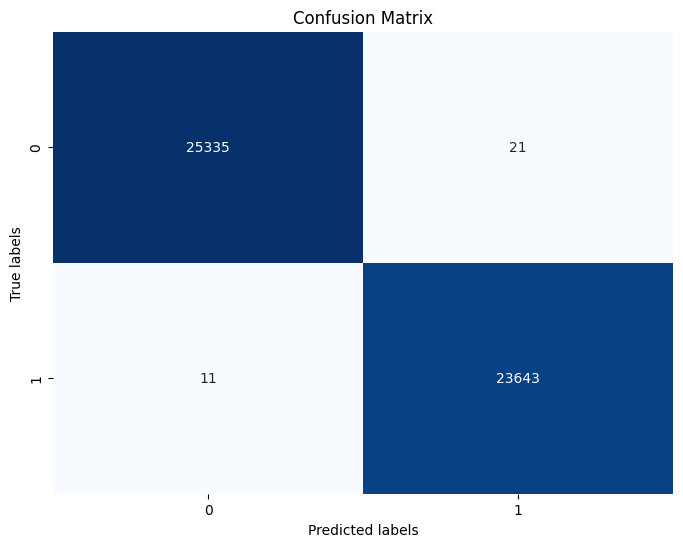

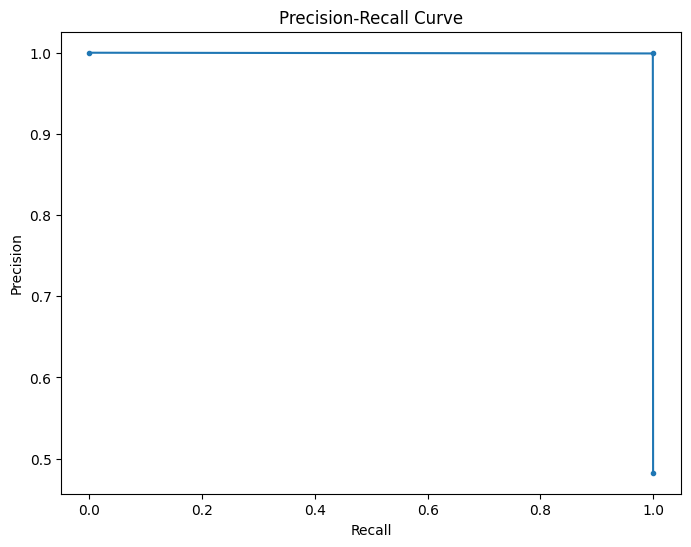

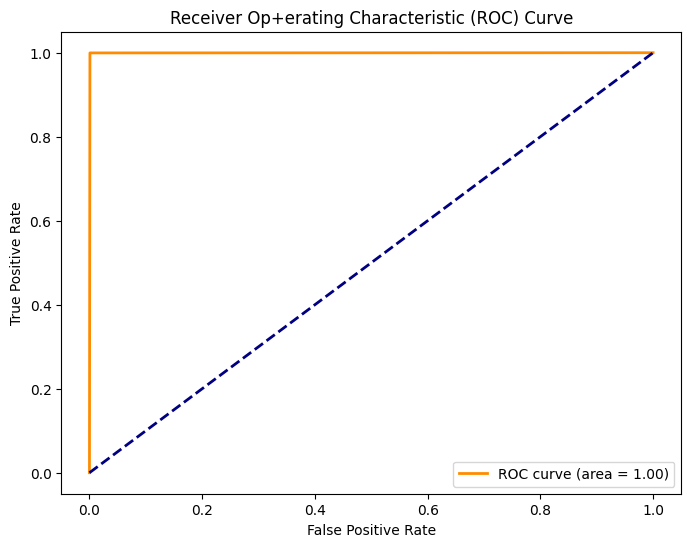

In [53]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Op+erating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ensemble 4: LSTM

In [76]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Further splitting the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (99505, 26) (99505,)
Validation set shape: (24505, 26) (24505,)
Test set shape: (24505, 26) (24505,)


In [106]:
from keras.utils import to_categorical

# Assuming y_train and y_test are your target values
num_classes = 5  # Number of classes in your classification task
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

In [126]:
print(y_test,"\n")

print(y_test_encoded)

[1 1 1 ... 1 0 1] 

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [96]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Bidirectional, Dropout, Dense, Reshape, Activation
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Split data into train and validation sets
# Prepare data in sequences

# Define multiple LSTM models
models = []
for i in range(3):
    # Define the model
    model = Sequential()
    model.add(Conv1D(64, kernel_size=122, padding="same", activation="relu", input_shape=(122, 1)))
    model.add(MaxPooling1D())
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(64, return_sequences=False))) 
    model.add(Reshape((128, 1), input_shape = (128, )))
    
    model.add(MaxPooling1D())
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(128, return_sequences=False))) 
    
    model.add(Dropout(0.5))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    models.append(model)

# Train each LSTM model
best_models = []
for model in models:
    model.fit(X_train,y_train_encoded, epochs=10, batch_size=64, validation_data=(X_val, y_val_encoded), verbose=1)
    # Save best-performing models based on validation performance
    best_models.append(model)


Epoch 1/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9780 - loss: 0.0871 - val_accuracy: 0.9962 - val_loss: 0.0135
Epoch 2/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9974 - val_loss: 0.0082
Epoch 3/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9977 - loss: 0.0069 - val_accuracy: 0.9966 - val_loss: 0.0088
Epoch 4/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9957 - val_loss: 0.0095
Epoch 5/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9977 - val_loss: 0.0057
Epoch 6/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9967 - val_loss: 0.0083
Epoch 7/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9988 - val_loss: 0.0036
Epoch 8/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9989 -

In [115]:
print(best_models)
print(y_test)
y

[<Sequential name=sequential_56, built=True>, <Sequential name=sequential_57, built=True>, <Sequential name=sequential_58, built=True>]
[1 1 1 ... 1 0 1]


In [129]:
# Create the ensemble
def ensemble_predict(X):
    predictions = np.zeros((len(X), 5))
    for model in best_models:
        p = model.predict(X)
        predictions += p
    return predictions / len(best_models)

# Evaluate the ensemble
ensemble_predictions = ensemble_predict(X_test)
print(ensemble_predictions.round())
ensemble_accuracy = accuracy_score(y_test_encoded, ensemble_predictions.round())
ensemble_precision = precision_score(y_test_encoded, ensemble_predictions.round(), average='macro')
ensemble_recall = recall_score(y_test_encoded, ensemble_predictions.round(), average='macro')

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Precision:", ensemble_precision)
print("Ensemble Recall:", ensemble_recall)

766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
Ensemble Accuracy: 0.9994286880228525
Ensemble Precision: 0.3997711834704118
Ensemble Recall: 0.3997711834704118


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


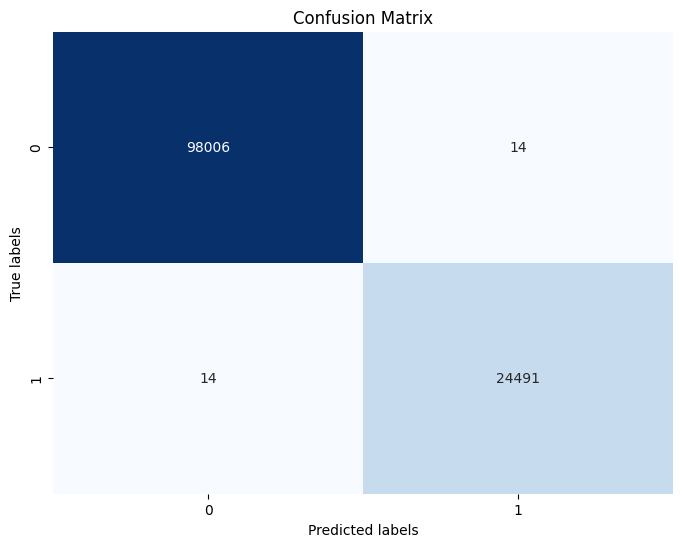

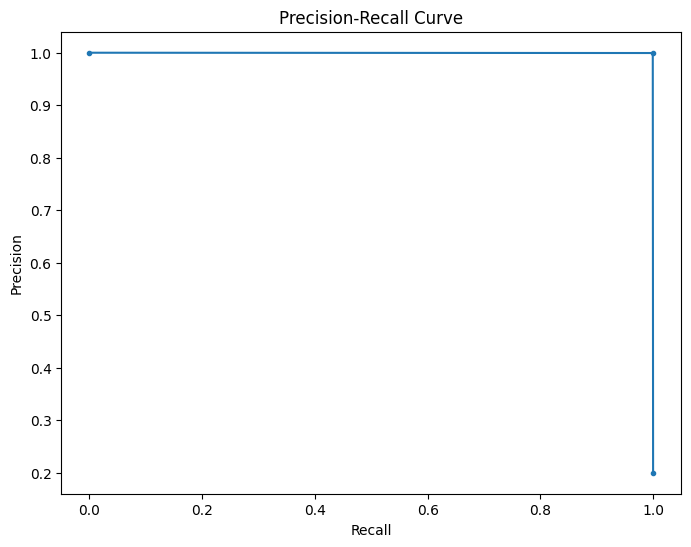

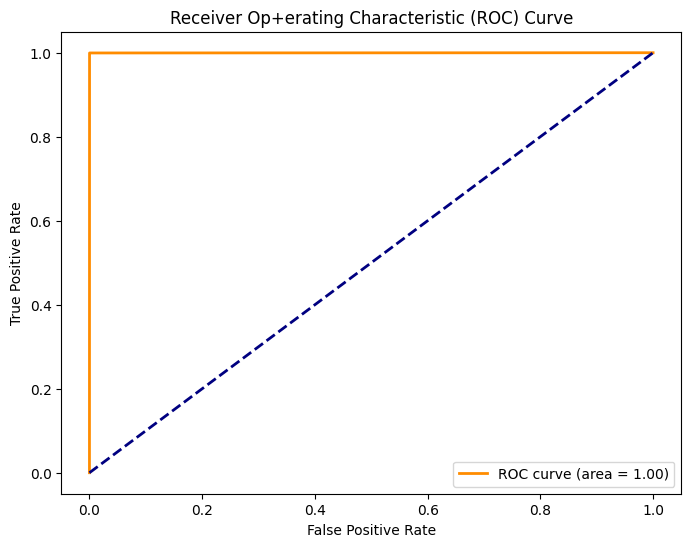

In [137]:
from sklearn.metrics import confusion_matrix
y_test_encoded=y_test_encoded.flatten()
ensemble_predictions=ensemble_predictions.round().flatten()
z = len(y_test_encoded)
y_test_binary = np.zeros(z)
ensemble_predictions_binary = np.zeros(z)
for i in range(z):
    y_test_binary[i] = 0 if y_test_encoded[i] == 0.0 else 1
    ensemble_predictions_binary[i] = 0 if ensemble_predictions[i] == 0.0 else 1
# Generate confusion matrix
cm = confusion_matrix(y_test_binary, ensemble_predictions_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_encoded, ensemble_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_encoded, ensemble_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Op+erating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()